<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_02/02_California_Housing_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 📦 Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import wandb
from wandb.integration.keras import WandbCallback

In [5]:
# 🔗 Initialize Weights & Biases
wandb.init(project="california-housing-regression", entity="rutujabhaskarrao-patil-san-jose-state-university")

In [6]:
# 📥 Load and Preprocess Data
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

In [8]:
# 🧾 Example Record for Explanation
example = X.iloc[0]
print("\n🔍 Example Input Features:")
print(example)
print(f"Actual Median House Value: ${y[0] * 100000:.2f}")


🔍 Example Input Features:
MedInc          8.325200
HouseAge       41.000000
AveRooms        6.984127
AveBedrms       1.023810
Population    322.000000
AveOccup        2.555556
Latitude       37.880000
Longitude    -122.230000
Name: 0, dtype: float64
Actual Median House Value: $452600.00


In [9]:
# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# 🧠 Build the Model (Functional API)
inputs = keras.Input(shape=(X_train_scaled.shape[1],))
x = keras.layers.Dense(128, activation='relu')(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.Dense(32, activation='relu')(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [11]:
# 🛠️ Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 📈 Train the Model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[WandbCallback(save_graph=False, save_model=False)]
)

Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1.6988 - mae: 0.8554 - val_loss: 0.4660 - val_mae: 0.4705
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4938 - mae: 0.4975 - val_loss: 0.4274 - val_mae: 0.4534
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4183 - mae: 0.4633 - val_loss: 0.4115 - val_mae: 0.4660
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4047 - mae: 0.4530 - val_loss: 0.4109 - val_mae: 0.4374
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3807 - mae: 0.4426 - val_loss: 0.3780 - val_mae: 0.4206
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3746 - mae: 0.4357 - val_loss: 0.3573 - val_mae: 0.4187
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3585 - mae: 0.4200 - val_loss: 0.3633 - val_mae: 0.4334
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3626 - mae: 0.4218 - val_loss: 0.3406 - val_mae: 0.4088
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - lo

In [12]:
# 📊 Evaluate the Model
y_pred = model.predict(X_test_scaled).flatten()
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [13]:
print(f"\nMAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


MAE: 0.3492
MSE: 0.2711
RMSE: 0.5207
R² Score: 0.7931


In [14]:
# 📌 Predict and Show Example
example_scaled = scaler.transform([example])
predicted_price = model.predict(example_scaled)[0][0] * 100000
print(f"\n🧠 Predicted Median House Value for Example: ${predicted_price:.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step

🧠 Predicted Median House Value for Example: $442191.84


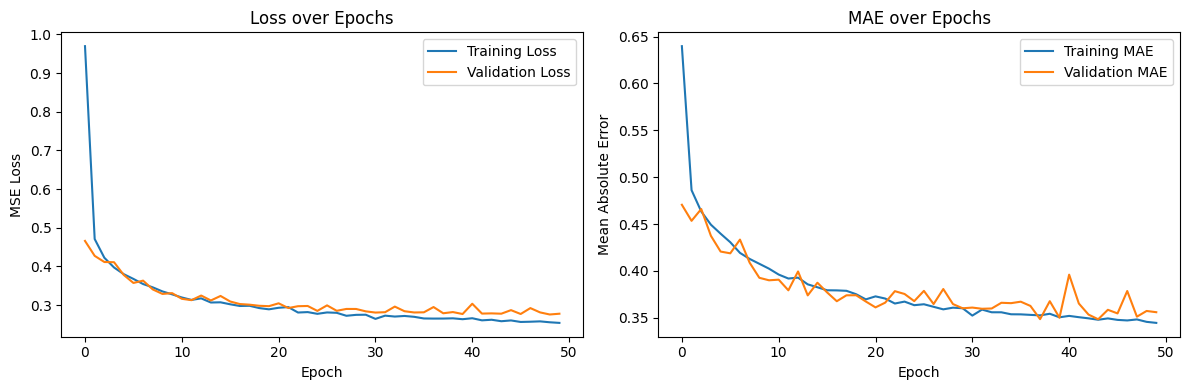

In [16]:
# 📉 Loss Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.tight_layout()
plt.show()

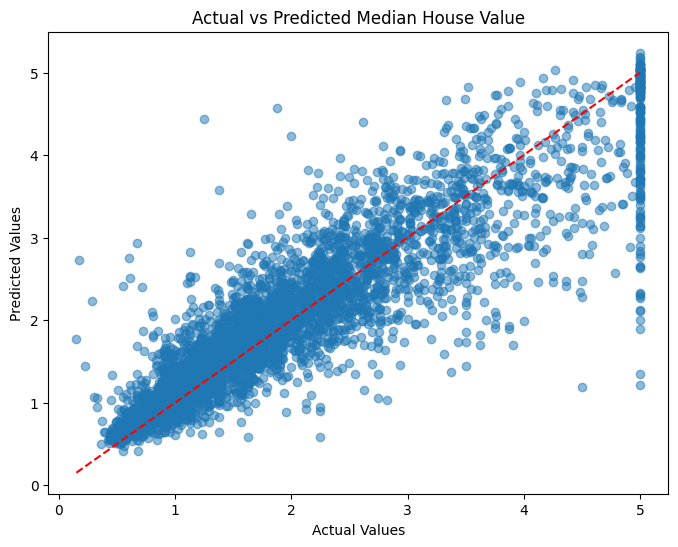

In [17]:
# 📈 Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Median House Value')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()

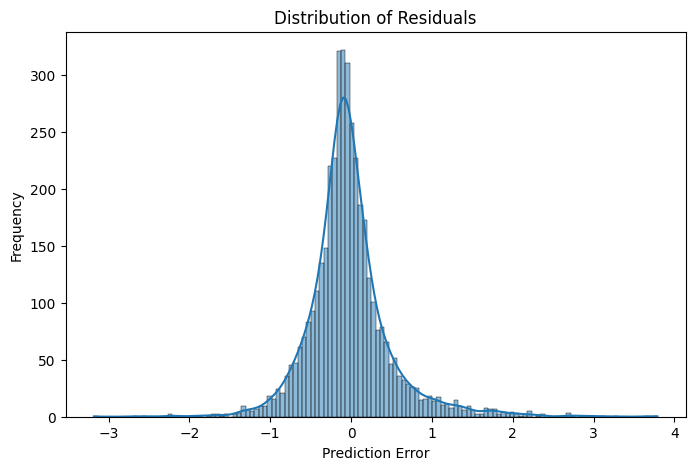

In [18]:
# 🧾 Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

In [19]:
# 🧠 Model Summary
print("\nModel Summary:")
model.summary()


Model Summary:


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,565 (135.02 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,044 (90.02 KB)


Model Architecture:


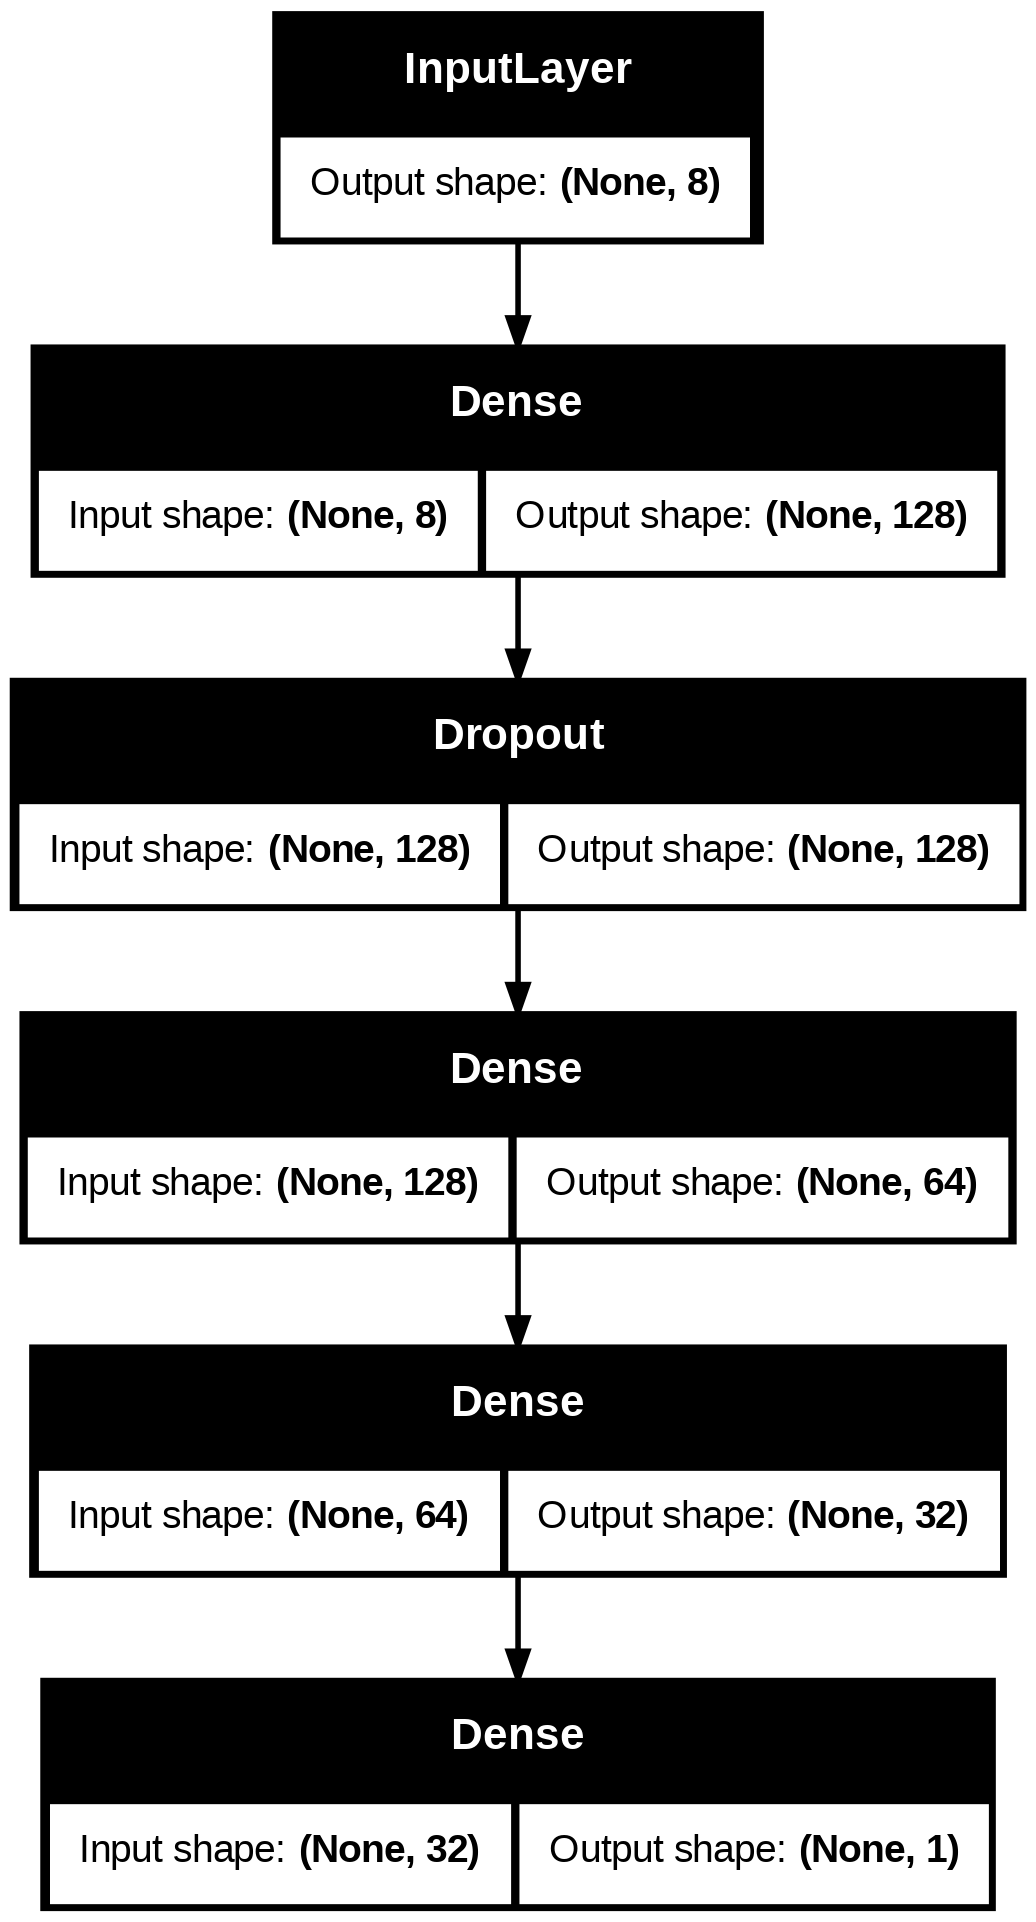

In [20]:
# 🖼️ Model Architecture Visualization
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display
plot_model(model, to_file="regression_model.png", show_shapes=True)
print("\nModel Architecture:")
display(Image("regression_model.png"))


In [21]:
# Finish WandB Run
wandb.finish()

epoch,▁▁▂▂▃▄▄▆▆▆▇▁▁▁▂▂▃▃▄▆▇▇▇██▁▁▁▂▂▃▃▄▄▄▅▇▇▇█
loss,▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▄▃▃▃▃▂▂▂▁▁▁▁▁█▅▄▃▃▂▂▂▁▂▂▁
mae,▇▆▄▃▂▂▂▂▂▂▁▁▁▁▇▅▅▄▄▃▃▂▂▂▂▂▁▁▁▁█▅▅▄▃▂▂▂▁▁
val_loss,▇▄▃▃▃▃▂▂▂▂▁▂▁█▄▅▃▃▂▂▁▂▂▂▁▅▆▄▃▃▂▂▂▂▁▁▁▁▃▁
val_mae,▆▆▆▅▄▃▃▃▂▂▂▂▁▁▂▁█▅▄▄▂▂▂▂▁▂▁▁▁▂▅▃▃▃▂▂▁▂▁▂
best_epoch,49
best_val_loss,0.27126
epoch,49
loss,0.25399
mae,0.34454
val_loss,0.27771
